<a href="https://colab.research.google.com/github/AshlinShaji/DL/blob/main/Brain_Tumer_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')
#

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import numpy as np
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [18]:
os.listdir('/content/drive/MyDrive/Brain_Tumor')

['Training', 'Testing']

In [19]:
os.listdir('/content/drive/MyDrive/Brain_Tumor/Testing')

['pituitary', 'notumor', 'meningioma', 'glioma']

In [20]:
os.listdir('/content/drive/MyDrive/Brain_Tumor/Training')

['glioma', 'pituitary', 'notumor', 'meningioma']

In [21]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Training/glioma'))

1287

In [22]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Training/pituitary'))

1349

In [23]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Training/notumor'))

1574

In [24]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Training/meningioma'))

1319

In [25]:
datadir='/content/drive/MyDrive/Brain_Tumor/Training'

In [26]:
# preprocessing training
x_train = []
y_train = []

Categories = ['glioma', 'pituitary', 'notumor', 'meningioma']

for i in Categories:
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)

        # FIXED: imread (not imgread)
        img_array = imread(imgpath, as_gray=True)

        # resize image
        img_resize = resize(img_array, (150, 150))

        x_train.append(img_resize)
        y_train.append(Categories.index(i))


In [27]:
#preprocessing of teseting data
datadir1='/content/drive/MyDrive/Brain_Tumor/Testing'
categories1=['glioma', 'pituitary', 'notumor', 'meningioma']
x_test=[]
y_test=[]
for i in categories1:
  path=os.path.join(datadir1,i)
  for img in os.listdir(path):
    imgpath=os.path.join(path,img)
    img_array=imread(imgpath)
    img_resize=resize(img_array,(150,150,1))
    x_test.append(img_resize)
    y_test.append(categories1.index(i))

In [30]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


In [32]:
#Model Creation
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
model.fit(x_train,y_train,epochs=20,batch_size=50)

Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 67s 586ms/step - accuracy: 0.5827 - loss: 1.1465
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 78s 564ms/step - accuracy: 0.8772 - loss: 0.3314
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 79s 537ms/step - accuracy: 0.9306 - loss: 0.1950
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 59s 533ms/step - accuracy: 0.9697 - loss: 0.1085
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 60s 536ms/step - accuracy: 0.9794 - loss: 0.0677
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 82s 541ms/step - accuracy: 0.9926 - loss: 0.0295
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 81s 537ms/step - accuracy: 0.9963 - loss: 0.0184
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 59s 534ms/step - accuracy: 0.9992 - loss: 0.0073
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 89s 596ms/step - accuracy: 0.9997 - loss: 0.0035
Epoch 10/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 63s 565ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 11/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 82s 563ms/step - accuracy: 1.0000 - loss: 0.0010
Epoch 12/20
111/111

In [35]:
model.evaluate(x_test,y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9419 - loss: 0.2918


[0.2288997769355774, 0.9549961686134338]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
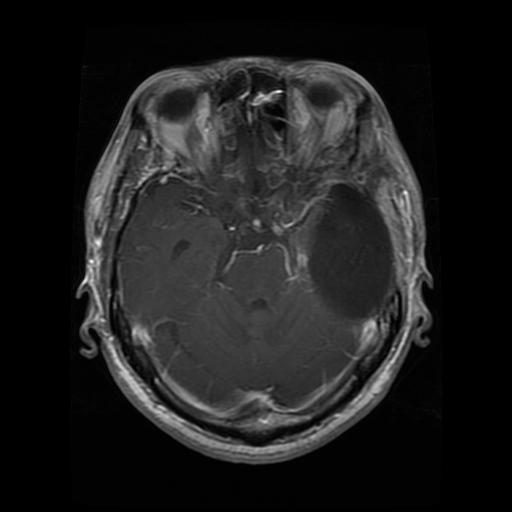

In [36]:
#prediction
img=imread('/content/drive/MyDrive/Brain_Tumor/Testing/glioma/Te-gl_0015.jpg')
img


In [39]:
img=resize(img,(1,150,150,1))
img.shape

(1, 150, 150, 1)

In [43]:
y_new=model.predict(img)
y_new
ind=y_new.argmax()
ind
Categories[ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


'glioma'